<a href="https://colab.research.google.com/github/Seenuprime/Deep-Learning/blob/main/neural_network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Creating the Dataset to view and fit

In [75]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(
    n_samples,
    noise = 0.03,
    random_state=42
)

In [76]:
X[:10], y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [77]:
df = pd.DataFrame({'X0': X[:, 0], 'X1': X[:, 1], 'laybel': y})
df.head()

,X0,X1,laybel
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


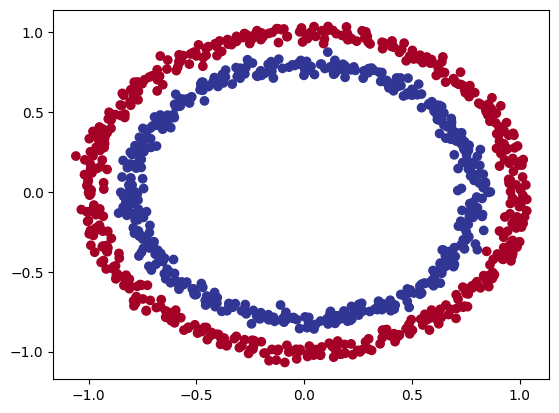

In [106]:
## Visualizing the data

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [79]:
tf.random.set_seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

performance = model.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.7508 - accuracy: 0.5030
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7384 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7297 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7232 - accuracy: 0.4950
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7186 - accuracy: 0.4940
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7151 - accuracy: 0.4940
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7118 - accuracy: 0.4940
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7094 - accuracy: 0.4880
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7072 - accuracy: 0.4870
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7055 - accuracy: 0.4830
Epoch 11/

<Axes: >

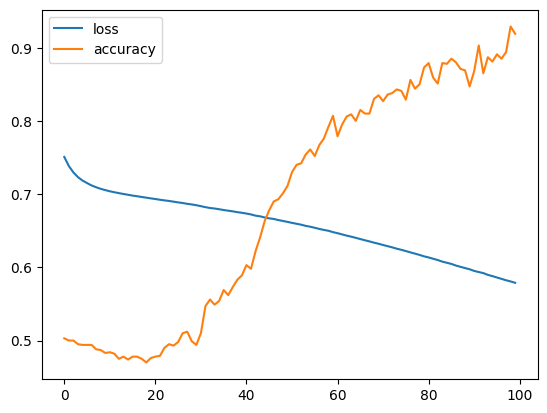

In [80]:
pd.DataFrame(performance.history).plot()

In [81]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


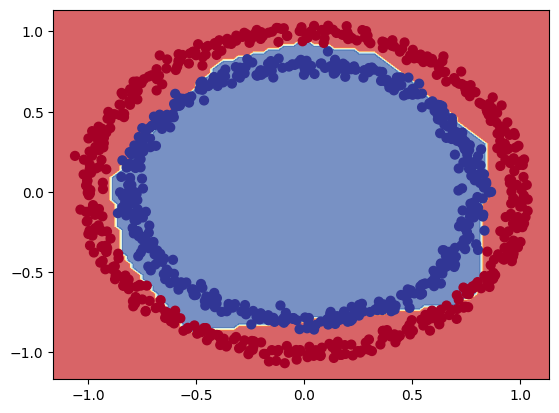

In [82]:
plot_decision_boundary(model, X, y)

**Understanding the Sigmoid activation function**

In [83]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

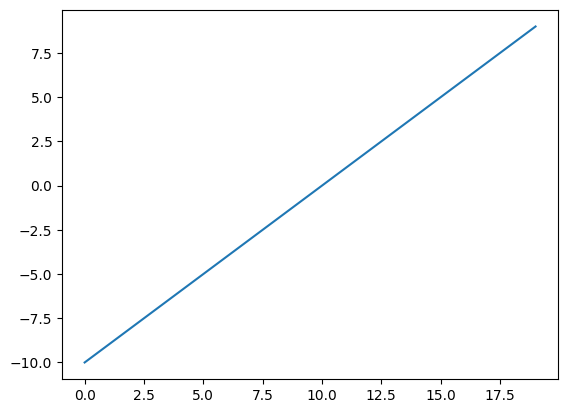

In [84]:
## Ploting the raw data

plt.plot(A)

In [85]:
 ##Applying sigmoid function to 'A'
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

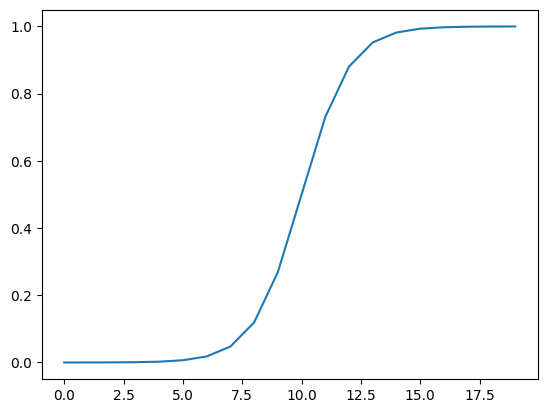

In [86]:
##Ploting the A after applying the sigmoid function
plt.plot(sigmoid(A))

**Understanding the Rectifier activation function**

In [87]:
def relu(x):
  return tf.maximum(0, x)

In [88]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

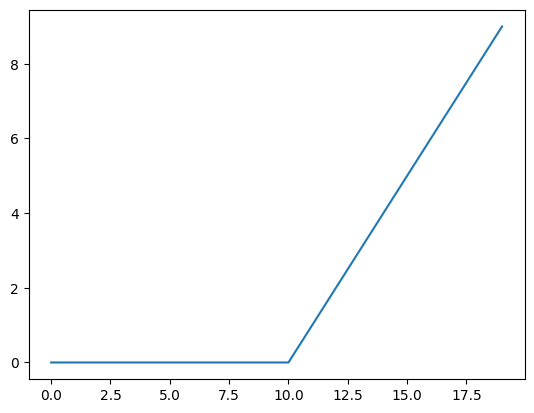

In [89]:
plt.plot(relu(A))

**Understanding the Linear activation function**

I will be the same as original

## Dividing the dataset and training the model

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [91]:
tf.random.set_seed(42)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.01),
    metrics = ['accuracy']
)

performance_1 = model_1.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.7024 - accuracy: 0.5025
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5788
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6764 - accuracy: 0.6187
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6662 - accuracy: 0.6100
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6533 - accuracy: 0.6250
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6305 - accuracy: 0.7337
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5896 - accuracy: 0.7900
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5325 - accuracy: 0.8525
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.4440 - accuracy: 0.9400
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.3609 - accuracy: 0.9787
Epoch 11/25
25/25 [

In [92]:
#Evaluating the model
model_1.evaluate(X_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.0611 - accuracy: 0.9900


[0.061050381511449814, 0.9900000095367432]

<Axes: >

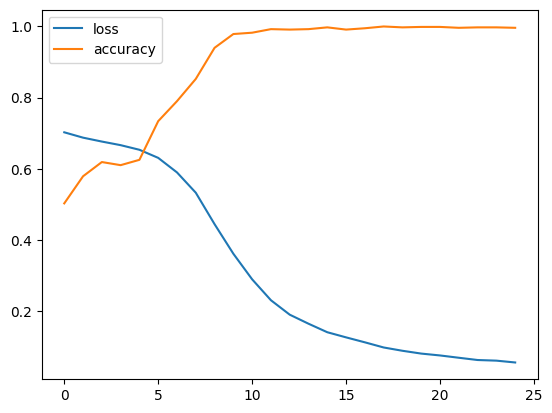

In [93]:
#Ploting the model performance
pd.DataFrame(performance_1.history).plot()

## Finding the Best Learning Rate

* A learning rate **callback** -- You can think of a callback as an extra piece of functionality, you can add it to your model at the time of training

In [94]:
tf.random.set_seed(42)

model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

## Callback has to done before the fitting the model:-
""" At the beginning of every epoch,
this callback gets the updated learning rate value from schedule function provided at __init__,
with the current epoch and current learning rate, and applies the updated learning rate on the optimizer.
"""

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

#Fitting the model (this time passing lr_scheduler callback)
performance_2 = model_2.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.7109 - accuracy: 0.5100 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7105 - accuracy: 0.5113 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7100 - accuracy: 0.5113 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7095 - accuracy: 0.5113 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7090 - accuracy: 0.5113 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7084 - accuracy: 0.5113 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7079 - accuracy: 0.5100 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7073 - accuracy: 0.5075 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

In [95]:
model_2.evaluate(X_train, y_train)

25/25 [==============================] - 0s 2ms/step - loss: 0.9406 - accuracy: 0.5200


[0.9406440258026123, 0.5199999809265137]

<Axes: >

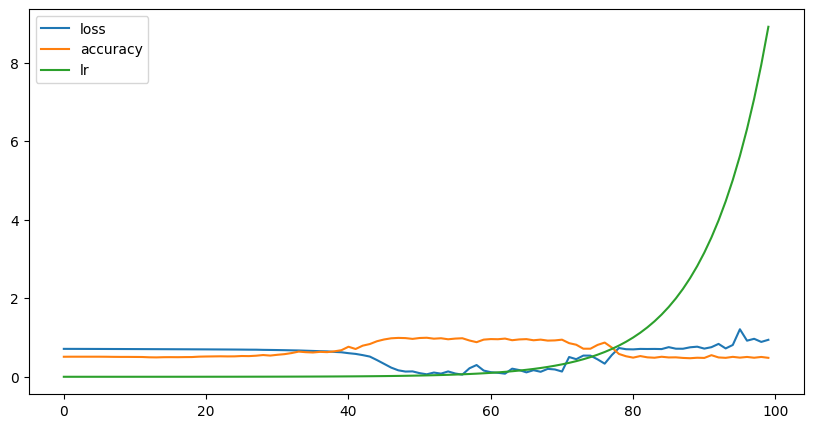

In [96]:
pd.DataFrame(performance_2.history).plot(figsize=(10,5))

Text(0.5, 1.0, 'Learning rate vs Loss')

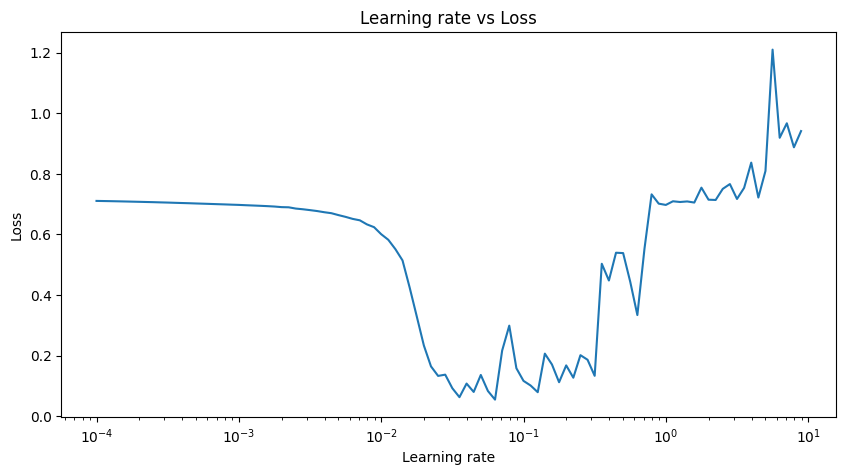

In [97]:
## Plot the learning rate versus loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 5))
plt.semilogx(lrs, performance_2.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

In [98]:
## We can select the lowest point (not after the hike) as the learning rate for the model

In [99]:
## Let's try using higher *ideal* learning rate with the same model

tf.random.set_seed(42)

model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.015),
    metrics = ['accuracy']
)

performance_3 = model_3.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.6920 - accuracy: 0.5125
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6868 - accuracy: 0.5663
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6825 - accuracy: 0.5562
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6761 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6635 - accuracy: 0.6075
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6472 - accuracy: 0.6338
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6196 - accuracy: 0.6438
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5920 - accuracy: 0.7138
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5357 - accuracy: 0.7563
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4494 - accuracy: 0.8025
Epoch 11/25
25/25 [

In [100]:
model_3.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0311 - accuracy: 0.9950


[0.031147174537181854, 0.9950000047683716]

<Axes: >

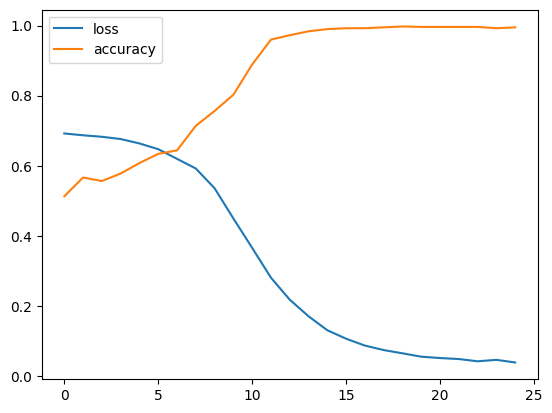

In [101]:
## ploting the model performance (i tried epochs=100 and i got more accuracy at the 18-20 epochs)
pd.DataFrame(performance_3.history).plot()

In [102]:
model_1.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0611 - accuracy: 0.9900


[0.061050381511449814, 0.9900000095367432]

In [103]:
model_2.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 1.0970 - accuracy: 0.4200


[1.0970063209533691, 0.41999998688697815]

In [104]:
model_3.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0311 - accuracy: 0.9950


[0.031147174537181854, 0.9950000047683716]

**More Classification Evaluation methods**

* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from sklearn)